# Retrieve CO-OPS data from an arbitrary time interval and region

In [1]:
import searvey

In [2]:
import geopandas
from matplotlib import pyplot

countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# retrieve a [list of CO-OPS stations](https://searvey.readthedocs.io/en/latest/coops.html#searvey.coops.coops_stations)

In [3]:
from searvey.coops import coops_stations

stations = coops_stations()
stations

,nws_id,name,state,status,removed,geometry
nos_id,,,,,,
1600012,46125,QREB buoy,,active,<NA>,POINT (122.60028 37.75008)
1619910,SNDP5,"Sand Island, Midway Islands",,active,<NA>,POINT (-177.36003 28.21170)
1630000,APRP7,"Apra Harbor, Guam",,active,<NA>,POINT (144.65636 13.44339)
1631428,PGBP7,"Pago Bay, Guam",,active,<NA>,POINT (144.79700 13.42830)
1770000,NSTP6,"Pago Pago, American Samoa",,active,<NA>,POINT (-170.68944 -14.27667)
...,...,...,...,...,...,...
9087079,GBWW3,Green Bay,WI,discontinued,"2020-10-28 13:00:00,2007-08-06 23:59:00,2007-0...",POINT (-88.00722 44.54111)
8770570,SBPT2,Sabine Pass North,TX,discontinued,"2021-01-18 00:00:00,2020-09-30 15:45:00,2020-0...",POINT (-93.87010 29.72840)
8775870,MQTT2,"Bob Hall Pier, Corpus Christi",TX,discontinued,"2021-12-22 20:00:00,2020-05-18 13:10:00,2019-0...",POINT (-97.21670 27.58000)


Text(0.5, 1.0, 'all CO-OPS stations')

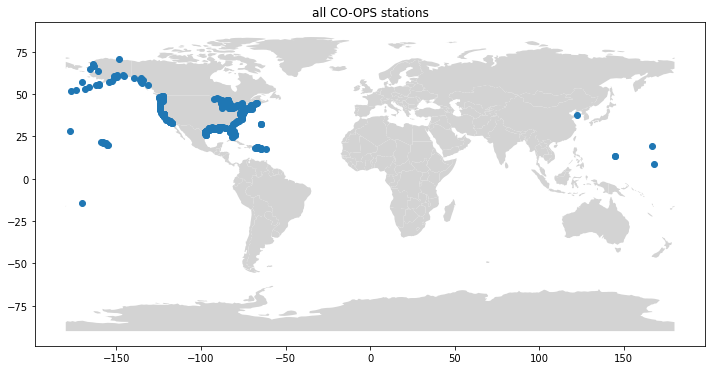

In [4]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

stations.plot(ax=axis)
countries.plot(color='lightgrey', ax=axis, zorder=-1)

axis.set_title(f'all CO-OPS stations')

# retrieve a [list of CO-OPS stations within an arbitrary polygon](https://searvey.readthedocs.io/en/latest/coops.html#searvey.coops.coops_stations_within_region)

In [5]:
import shapely
from searvey.coops import coops_stations_within_region

east_coast = shapely.geometry.box(-85, 25, -65, 45)
east_coast_stations = coops_stations_within_region(region=east_coast)
east_coast_stations

,nws_id,name,state,status,removed,geometry
nos_id,,,,,,
8726679,TSHF1,East Bay Causeway,FL,active,<NA>,POINT (-82.42575 27.92889)
8726694,TPAF1,TPA Cruise Terminal 2,FL,active,<NA>,POINT (-82.43330 27.93330)
9044036,FWNM4,Fort Wayne,MI,active,"2005-04-29 23:59:00,2005-04-29 00:00:00,2001-1...",POINT (-83.09330 42.29830)
9075035,ESVM4,Essexville,MI,active,"2007-03-28 23:59:00,2007-03-28 00:00:00,2007-0...",POINT (-83.84680 43.64040)
9052076,OCTN6,Olcott,NY,active,"2007-06-01 23:59:00,2007-06-01 00:00:00,2004-0...",POINT (-78.72733 43.33839)
...,...,...,...,...,...,...
8654400,CFPN7,Cape Hatteras Fishing Pier,NC,discontinued,"2018-09-19 23:59:00,2003-09-18 23:59:00,2003-0...",POINT (-75.63500 35.22330)
8720625,RCYF1,"Racy Point, St Johns River",FL,discontinued,"2019-08-05 14:00:00,2017-06-14 15:36:00,2017-0...",POINT (-81.54830 29.80170)
8423898,FTPN3,Fort Point,NH,discontinued,"2020-04-13 00:00:00,2014-08-05 00:00:00,2012-0...",POINT (-70.71056 43.07139)


Text(0.5, 1.0, 'CO-OPS stations on the U.S. East Coast')

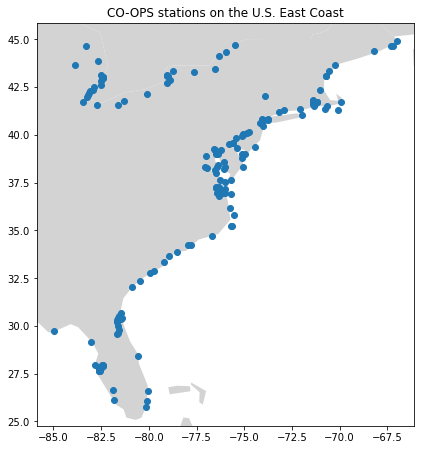

In [6]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

east_coast_stations.plot(ax=axis)

xlim = axis.get_xlim()
ylim = axis.get_ylim()
countries.plot(color='lightgrey', ax=axis, zorder=-1)
axis.set_xlim(xlim)
axis.set_ylim(ylim)

axis.set_title(f'CO-OPS stations on the U.S. East Coast')

# retrieve a [CO-OPS data product from all stations within an arbitrary polygon](https://searvey.readthedocs.io/en/latest/coops.html#searvey.coops.coops_product_within_region)

In [7]:
from datetime import datetime
from searvey.coops import coops_product_within_region

water_levels = coops_product_within_region(
    'water_level',
    region=east_coast,
    start_date=datetime(2022, 4, 2, 12),
    end_date=datetime(2022, 4, 2, 12, 30),
)
water_levels

<xarray.Dataset>
Dimensions:  (t: 6, nos_id: 112)
Coordinates:
  * t        (t) datetime64[ns] 2022-04-02T12:00:00 ... 2022-04-02T12:30:00
  * nos_id   (nos_id) object '9044036' '9075035' ... '8573364' '8519483'
    nws_id   (nos_id) <U5 'FWNM4' 'ESVM4' 'OCTN6' ... 'NCDV2' 'TCBM2' 'BGNN6'
    x        (nos_id) float64 -83.09 -83.85 -78.73 ... -77.04 -76.25 -74.14
    y        (nos_id) float64 42.3 43.64 43.34 42.09 ... 38.98 38.32 39.21 40.64
Data variables:
    v        (nos_id, t) float32 175.1 175.1 175.1 175.1 ... 2.579 2.611 2.631
    s        (nos_id, t) float32 0.0 0.0 0.0 0.0 0.0 ... 0.026 0.02 0.024 0.027
    f        (nos_id, t) object '0,0,0,0' '0,0,0,0' ... '0,0,0,0' '0,0,0,0'
    q        (nos_id, t) object 'v' 'v' 'v' 'v' 'v' 'v' ... 'v' 'v' 'v' 'v' 'v'

Text(0.5, 1.0, 'maximum water levels observed by CO-OPS stations on the U.S. East Coast between 2022-04-02 12:00:00 and 2022-04-02 12:30:00')

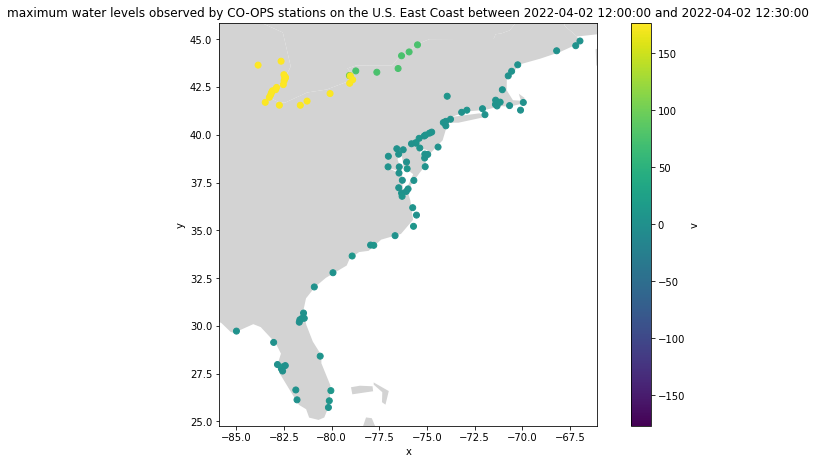

In [8]:
import pandas

figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

water_levels.max('t').plot.scatter(x='x', y='y', hue='v', cmap='viridis', ax=axis)

xlim = axis.get_xlim()
ylim = axis.get_ylim()
countries.plot(color='lightgrey', ax=axis, zorder=-1)
axis.set_xlim(xlim)
axis.set_ylim(ylim)

start_date = pandas.to_datetime(water_levels['t'].min().values)
end_date = pandas.to_datetime(water_levels['t'].max().values)
axis.set_title(f'maximum water levels observed by CO-OPS stations on the U.S. East Coast between {start_date} and {end_date}')

# retrieve a CO-OPS data product from a [specific station](https://searvey.readthedocs.io/en/latest/coops.html#searvey.coops.COOPS_Station)

In [9]:
from searvey.coops import COOPS_Station

station = COOPS_Station(1612480)
station_water_levels = station.product(
    'water_level',
    start_date=datetime(2022, 4, 2, 12),
    end_date=datetime(2022, 4, 2, 12, 30),
)
station_water_levels

<xarray.Dataset>
Dimensions:  (nos_id: 1, t: 6)
Coordinates:
  * nos_id   (nos_id) object '1612480'
  * t        (t) datetime64[ns] 2022-04-02T12:00:00 ... 2022-04-02T12:30:00
    nws_id   (nos_id) <U5 'MOKH1'
    x        (nos_id) float64 -157.8
    y        (nos_id) float64 21.43
Data variables:
    v        (nos_id, t) float32 1.406 1.409 1.414 1.417 1.417 1.422
    s        (nos_id, t) float32 0.001 0.002 0.002 0.002 0.001 0.002
    f        (nos_id, t) object '0,0,0,0' '0,0,0,0' ... '0,0,0,0' '0,0,0,0'
    q        (nos_id, t) object 'v' 'v' 'v' 'v' 'v' 'v'

Text(0.5, 1.0, 'water level observed by CO-OPS station 1612480 ("Mokuoloe") between 2022-04-02 12:00:00 and 2022-04-02 12:30:00')

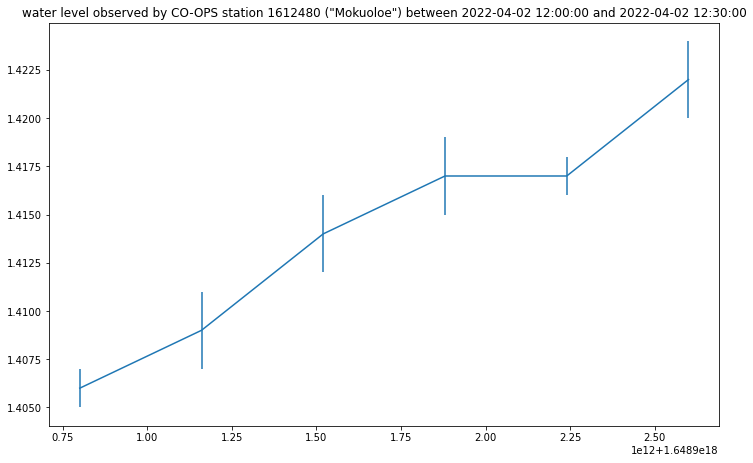

In [10]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

axis.errorbar(
    station_water_levels['t'],
    station_water_levels['v'].isel(nos_id=0),
    yerr=station_water_levels['s'].isel(nos_id=0).values,
)

start_date = pandas.to_datetime(station_water_levels['t'].min().values)
end_date = pandas.to_datetime(station_water_levels['t'].max().values)
axis.set_title(f'water level observed by CO-OPS station {station.id} ("{station.name}") between {start_date} and {end_date}')

# additional documentation
## https://searvey.readthedocs.io
## https://github.com/oceanmodeling/searvey
